# Mediation and Confounding in Causal Inference

## Problem Setup

This notebook demonstrates the distinction between **direct effects**, **total effects**, and how confounding/mediation relationships affect statistical inference.

### The Data Generating Process

We simulate three variables following these relationships:

**Step 1: Generate the first predictor**
$$x_1 \sim N(0, 2)$$

Intuitively: $x_1$ is drawn from a normal distribution with mean 0 and standard deviation 2.

**Step 2: Create a confounded/mediated relationship**
$$x_2 = \beta_{12} \cdot x_1 + \epsilon_{12}, \quad \epsilon_{12} \sim N(0, 1.5)$$

Intuitively: $x_2$ is partially determined by $x_1$ (scaled by $\beta_{12}$) plus random noise. When $\beta_{12} \neq 0$, the two predictors are correlated—this is the confounding/mediation pathway. The noise term ensures they're not perfectly related.

**Step 3: Generate the outcome**
$$y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \epsilon, \quad \epsilon \sim N(0, 0.5)$$

Intuitively: The outcome $y$ is determined by both $x_1$ and $x_2$ with direct effect sizes $\beta_1$ and $\beta_2$ respectively, plus measurement noise.

## Key Concepts

### Direct Effect vs. Total Effect

When you observe a simple bivariate relationship (e.g., regress $y$ on only $x_1$), you capture the **total effect**, which includes:

- The **direct effect** of $x_1$ on $y$ (coefficient $\beta_1$)
- The **indirect effect** through $x_2$: $x_1 \rightarrow x_2 \rightarrow y$ (magnitude: $\beta_{12} \times \beta_2$)

**Total effect of $x_1$ on $y$:**
$$\text{Total effect} = \beta_1 + \beta_{12} \cdot \beta_2$$

This is what you observe if you only look at $x_1$ without accounting for $x_2$.

**Direct effect of $x_1$ on $y$:**
$$\text{Direct effect} = \beta_1$$

This is the effect of $x_1$ after controlling for $x_2$.

### The Role of $\beta_{12}$

- When $\beta_{12} = 0$: The two predictors are independent. Total and direct effects coincide.
- When $\beta_{12} > 0$: $x_1$ and $x_2$ are positively correlated. The indirect pathway amplifies or dampens the total effect depending on the sign of $\beta_2$.
- When $\beta_{12} < 0$: $x_1$ and $x_2$ are negatively correlated. The relationship works in the opposite direction.

## Interactive Exploration

Use the sliders to adjust $\beta_1$, $\beta_2$, and $\beta_{12}$, and observe how these parameters affect all four plots simultaneously.

In [29]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

interactive(children=(FloatSlider(value=0.5, description='beta1', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

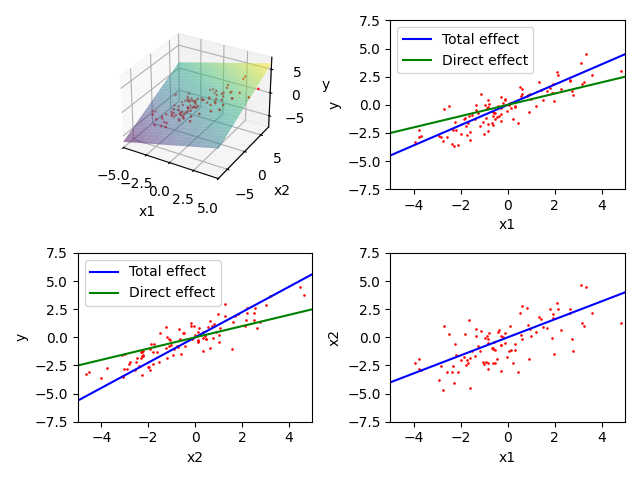

In [30]:
def plot_all(fig, x1, x2, y, beta1, beta2, beta12):
    xi = np.linspace(-5, 5, 30)
    xj = np.linspace(-7.5, 7.5, 30)
    X1, X2 = np.meshgrid(xi, xj)
    Yplane = beta1 * X1 + beta2 * X2

    fig.clf()
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot_surface(X1, X2, Yplane, alpha=0.5, cmap='viridis', edgecolor='none')
    ax1.scatter(x1, x2, y, color='r', s=3, marker='.')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-7.5, 7.5)
    ax1.set_zlim(-7.5, 7.5)

    ax2 = fig.add_subplot(2, 2, 2)
    ax2.scatter(x1, y, color='r', s=3, marker='.')
    x = np.linspace(-5, 5, 100)
    ax2.plot(x, (beta1 + beta2 * beta12) * x, color='b', label='Total effect')
    ax2.plot(x, (beta1 * x), color='g', label='Direct effect')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('y')
    ax2.legend(loc='upper left')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-7.5, 7.5)

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.scatter(x2, y, color='r', s=3, marker='.')  
        
    x = np.linspace(-5, 5, 100)
    if beta12 == 0:
        ax3.plot(x, (np.nan * x), color='b', label='Total effect')
    else:
        ax3.plot(x, ((beta1 / beta12) + beta2) * x, color='b', label='Total effect')
    ax3.plot(x, (beta2 * x), color='g', label='Direct effect')
    ax3.set_xlabel('x2')
    ax3.set_ylabel('y')
    ax3.legend(loc='upper left')
    ax3.set_xlim(-5, 5)
    ax3.set_ylim(-7.5, 7.5)

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.scatter(x1, x2, color='r', s=3, marker='.')
    x = np.linspace(-5, 5, 100)
    ax4.plot(x, beta12 * x, color='b')
    ax4.set_xlabel('x1')
    ax4.set_ylabel('x2')
    ax4.set_xlim(-5, 5)
    ax4.set_ylim(-7.5, 7.5)

    fig.tight_layout()
    fig.canvas.draw_idle()

def get_data(beta1: float, beta2: float, beta12: float):
    n = 100
    std = 0.5
    std12 = 1.5

    rng = npr.default_rng(1024)
    eps = rng.normal(0, std, n)
    eps12 = rng.normal(0, std12, n)

    x1 = rng.normal(0, 2, n)
    x2 = beta12 * x1 + eps12

    y = beta1 * x1 + beta2 * x2 + eps
    return x1, x2, y

fig = plt.figure()
beta1, beta2, beta12 = 0.5, 0.5, 0.8
x1, x2, y = get_data(beta1, beta2, beta12)
plot_all(fig, x1, x2, y, beta1, beta2, beta12)

def update(beta1=0.5, beta2=0.5, beta12=0.8):
    x1, x2, y = get_data(beta1, beta2, beta12)
    plot_all(fig, x1, x2, y, beta1, beta2, beta12)

interactive(update, beta1=(-1, 1, 0.05), beta2=(-1, 1, 0.05), beta12=(-2, 2, 0.05))
